In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [2]:
x, y = make_blobs(centers=4, random_state=42)

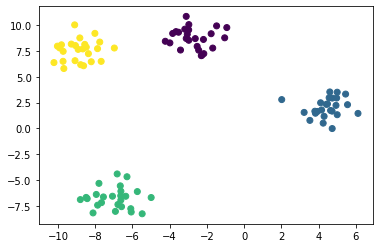

In [3]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [4]:
class CustomLogisticReg:
    
    def __init__(self, lr = .1, max_iters = 50):
        
        self.lr = lr
        self.max_iters = max_iters
        
    def fit(self, x, y):
        
        x = np.hstack([np.ones((x.shape[0], 1)), x])
        
        self.classes = np.unique(y)
    
        thetas = []
        
        for klass in self.classes:
            
            y_mod = (y == klass).astype(int)
            
            theta = np.random.randn(x.shape[1], 1)
            
            for i in range(self.max_iters):
            
                theta = self.gradient_accend(x, y_mod, theta)
                
            thetas.append(theta)
        
        self.thetas = np.hstack(thetas)
            
    def gradient_accend(self, x, y, theta):
        
        delta_theta = self.gradient(x, y, theta)
        
        theta += delta_theta
        
        return theta
        
    def gradient(self, x, y, theta):
        
        ya = y.reshape(-1, 1)
        yp = self.hypo(x, theta)
        
        diff = (ya - yp)
        
        dlltheta = np.dot(x.T, diff)/len(x)
        
        return dlltheta * self.lr
        
    def hypo(self, x, theta):
        
        g = np.dot(x, theta)
        return 1 / (1 + np.exp(-g))
    
    def predict(self, x):
        x = np.hstack([np.ones((x.shape[0], 1)), x])
        result = self.hypo(x, self.thetas)
        return result.argmax(axis=1)
    
    def score(self, x, y):
        yp = self.predict(x)
        return (yp==y).mean()

In [5]:
model = CustomLogisticReg()

In [6]:
model.fit(x, y)

In [7]:
model.thetas

array([[-1.77397798, -0.30375715, -0.44669999, -0.93924647],
       [ 0.15119547,  0.95605545, -0.27345083, -0.11797155],
       [ 0.3058444 , -0.17318763, -0.88726465,  0.07389173]])

In [8]:
model.predict(x[:10])

array([3, 2, 0, 2, 3, 2, 1, 1, 1, 0])

In [9]:
y[:10]

array([3, 2, 0, 2, 3, 2, 1, 1, 1, 0])

In [10]:
model.score(x, y)

0.99